In [1]:
import os
import torch
from PIL import Image
from tqdm import tqdm
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import umap
from torchvision import transforms
import clip

# 设置数据路径
data_path = "/cpfs04/user/hanyujin/causal-dm/Integrated-Design-Diffusion-Model/datasets/sunshadow_contrastive_ternary"

# 加载 CLIP 模型
device = "cuda" if torch.cuda.is_available() else "cpu"
model, preprocess = clip.load("ViT-B/32", device=device)

# 数据存储
features = []
labels = []

# 数据预处理
transform = preprocess

# 遍历每个子文件夹读取图像
label_map = {"0": 0, "1": 1, "2": 2}  # 定义子文件夹与标签的映射
for label_name, label_id in label_map.items():
    folder_path = os.path.join(data_path, label_name)
    if not os.path.exists(folder_path):
        print(f"Warning: Folder {folder_path} does not exist.")
        continue

    for img_name in tqdm(os.listdir(folder_path), desc=f"Processing label {label_name}"):
        img_path = os.path.join(folder_path, img_name)
        try:
            # 打开并预处理图像
            image = Image.open(img_path).convert("RGB")
            image = transform(image).unsqueeze(0).to(device)

            # 提取 CLIP 表征
            with torch.no_grad():
                feature = model.encode_image(image).cpu().numpy().flatten()

            # 保存特征和标签
            features.append(feature)
            labels.append(label_id)
        except Exception as e:
            print(f"Error processing {img_path}: {e}")

# 转换为 numpy 数组
features = np.array(features)
labels = np.array(labels)

print(f"Extracted features shape: {features.shape}")
print(f"Labels shape: {labels.shape}")

# 降维
def reduce_dimensionality(data, method, n_components=2):
    if method == "PCA":
        reducer = PCA(n_components=n_components)
    elif method == "TSNE":
        reducer = TSNE(n_components=n_components, random_state=42)
    elif method == "UMAP":
        reducer = umap.UMAP(n_components=n_components, random_state=42)
    else:
        raise ValueError(f"Unknown dimensionality reduction method: {method}")
    reduced_data = reducer.fit_transform(data)
    return reduced_data
# 可视化
def visualize_data(reduced_data, labels, method):
    plt.figure(figsize=(8, 6))
    for label in np.unique(labels):
        plt.scatter(
            reduced_data[labels == label, 0],
            reduced_data[labels == label, 1],
            label=f"Label {label}",
            alpha=0.7
        )
    plt.title(f"Visualization of CLIP Features ({method})")
    plt.xlabel("Dimension 1")
    plt.ylabel("Dimension 2")
    plt.legend()
    plt.grid(True)
    plt.show()

/root/miniconda3/envs/yjenv/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
2025-01-13 10:05:15.324100: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-01-13 10:05:15.385882: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:479] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-01-13 10:05:15.448929: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:10575] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-01-13 10:05:15.44

Error processing /cpfs04/user/hanyujin/causal-dm/Integrated-Design-Diffusion-Model/datasets/sunshadow_contrastive_ternary/0/physical_law.pdf: cannot identify image file '/cpfs04/user/hanyujin/causal-dm/Integrated-Design-Diffusion-Model/datasets/sunshadow_contrastive_ternary/0/physical_law.pdf'


Processing label 1:  33%|███▎      | 655/1970 [00:25<00:49, 26.38it/s]

Error processing /cpfs04/user/hanyujin/causal-dm/Integrated-Design-Diffusion-Model/datasets/sunshadow_contrastive_ternary/1/physical_law.pdf: cannot identify image file '/cpfs04/user/hanyujin/causal-dm/Integrated-Design-Diffusion-Model/datasets/sunshadow_contrastive_ternary/1/physical_law.pdf'


Processing label 2:  33%|███▎      | 517/1548 [00:21<00:37, 27.41it/s]

Error processing /cpfs04/user/hanyujin/causal-dm/Integrated-Design-Diffusion-Model/datasets/sunshadow_contrastive_ternary/2/physical_law.pdf: cannot identify image file '/cpfs04/user/hanyujin/causal-dm/Integrated-Design-Diffusion-Model/datasets/sunshadow_contrastive_ternary/2/physical_law.pdf'


Processing label 2: 100%|██████████| 1548/1548 [01:03<00:00, 24.53it/s]

Extracted features shape: (4964, 512)
Labels shape: (4964,)


Reducing dimensionality using UMAP...


/root/miniconda3/envs/yjenv/lib/python3.11/site-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


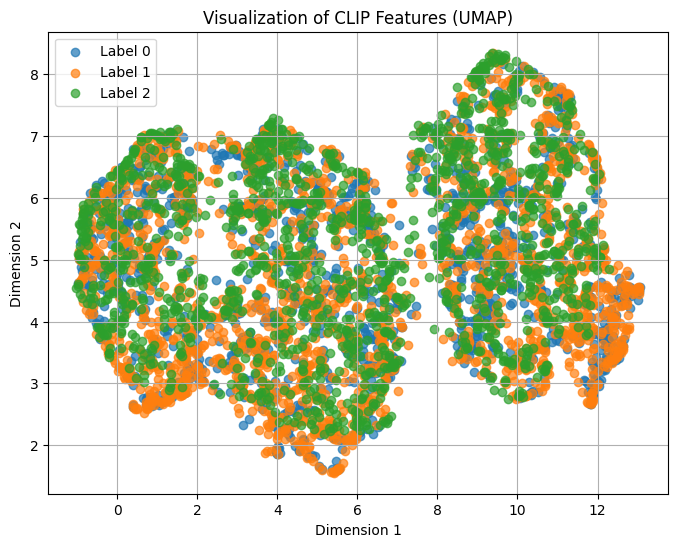

In [2]:
dim_reduction_method = "UMAP"  # 可选 "PCA", "TSNE", 或 "UMAP"
target_dim = 2  # 可视化维度固定为 2
print(f"Reducing dimensionality using {dim_reduction_method}...")
reduced_features = reduce_dimensionality(features, dim_reduction_method, target_dim)

visualize_data(reduced_features, labels, dim_reduction_method)

Reducing dimensionality using PCA...


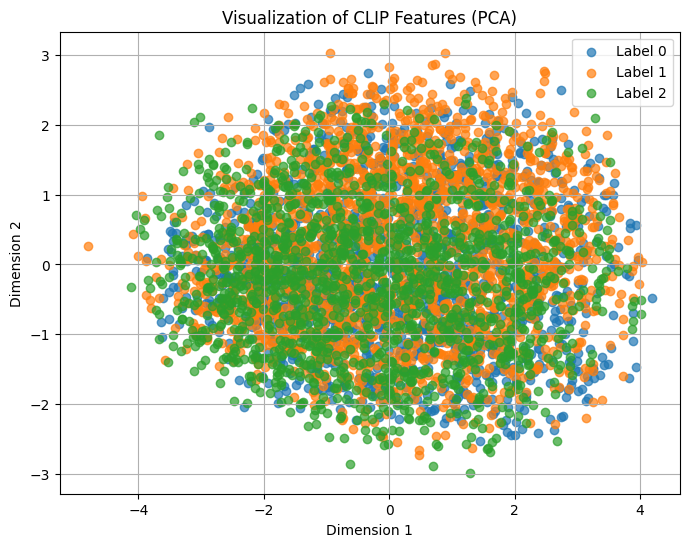

In [3]:
dim_reduction_method = "PCA"  # 可选 "PCA", "TSNE", 或 "UMAP"
target_dim = 2  # 可视化维度固定为 2
print(f"Reducing dimensionality using {dim_reduction_method}...")
reduced_features = reduce_dimensionality(features, dim_reduction_method, target_dim)

visualize_data(reduced_features, labels, dim_reduction_method)

Reducing dimensionality using TSNE...


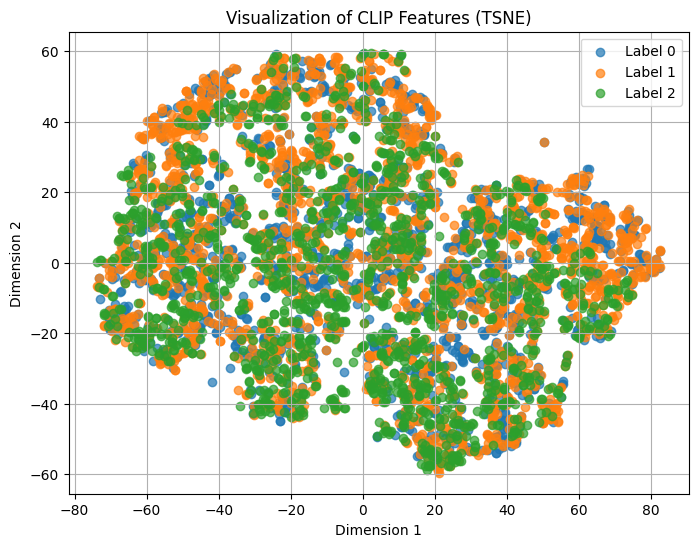

In [4]:
dim_reduction_method = "TSNE"  # 可选 "PCA", "TSNE", 或 "UMAP"
target_dim = 2  # 可视化维度固定为 2
print(f"Reducing dimensionality using {dim_reduction_method}...")
reduced_features = reduce_dimensionality(features, dim_reduction_method, target_dim)

visualize_data(reduced_features, labels, dim_reduction_method)

In [1]:
import os
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms, models
from torch.utils.data import DataLoader, random_split
from tqdm import trange
# 设置路径
data_path = "/cpfs04/user/hanyujin/causal-dm/Integrated-Design-Diffusion-Model/datasets/sunshadow_contrastive_ternary"

# 超参数设置
batch_size = 64
num_epochs = 100
learning_rate = 0.001
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

# 数据预处理
transform = transforms.Compose([
    transforms.Resize((224, 224)),  # 调整图片大小以适配预训练模型
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])  # 使用 ImageNet 均值和标准差归一化
])

# 加载数据集
dataset = datasets.ImageFolder(root=data_path, transform=transform)

# 数据集划分：80% 用于训练，20% 用于测试
train_size = int(0.8 * len(dataset))
test_size = len(dataset) - train_size
train_dataset, test_dataset = random_split(dataset, [train_size, test_size])

# 数据加载器
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

# 定义神经网络（使用预训练的 ResNet18）
model = models.resnet18(pretrained=True)  # 加载预训练的 ResNet18
model.fc = nn.Linear(model.fc.in_features, 3)  # 修改最后一层全连接层输出为 3 类
model = model.to(device)

# 定义损失函数和优化器
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

# 训练和测试函数
def train_one_epoch(model, train_loader, optimizer, criterion, device):
    model.train()
    running_loss = 0.0
    correct = 0
    total = 0
    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)
        
        # 前向传播
        outputs = model(images)
        loss = criterion(outputs, labels)
        
        # 反向传播和优化
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        # 统计损失和准确率
        running_loss += loss.item() * images.size(0)
        _, predicted = outputs.max(1)
        total += labels.size(0)
        correct += predicted.eq(labels).sum().item()
    
    epoch_loss = running_loss / total
    epoch_accuracy = 100. * correct / total
    return epoch_loss, epoch_accuracy

def test_model(model, test_loader, criterion, device):
    model.eval()
    running_loss = 0.0
    correct = 0
    total = 0
    with torch.no_grad():
        for images, labels in test_loader:
            images, labels = images.to(device), labels.to(device)
            
            # 前向传播
            outputs = model(images)
            loss = criterion(outputs, labels)
            
            # 统计损失和准确率
            running_loss += loss.item() * images.size(0)
            _, predicted = outputs.max(1)
            total += labels.size(0)
            correct += predicted.eq(labels).sum().item()
    
    epoch_loss = running_loss / total
    epoch_accuracy = 100. * correct / total
    return epoch_loss, epoch_accuracy

# 训练循环
for epoch in trange(1, num_epochs + 1):
    train_loss, train_accuracy = train_one_epoch(model, train_loader, optimizer, criterion, device)
    test_loss, test_accuracy = test_model(model, test_loader, criterion, device)
    
    # 每 10 个 epoch 打印一次结果
    if epoch % 10 == 0:
        print(f"Epoch [{epoch}/{num_epochs}]")
        print(f"Train Loss: {train_loss:.4f}, Train Accuracy: {train_accuracy:.2f}%")
        print(f"Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.2f}%")

print("Training complete!")


/root/miniconda3/envs/yjenv/lib/python3.11/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/root/miniconda3/envs/yjenv/lib/python3.11/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
  0%|          | 0/100 [01:42<?, ?it/s]


KeyboardInterrupt: 